In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Load datasets

In [2]:
playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseason_data = '.\Seasons_Stats.csv'
salarydata = './nba_salaries_1990_to_2018.csv'
rpm_data = './RPM_data.xlsx'

playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseason_data)
salarydata = pd.read_csv(salarydata)
rpmdata = pd.read_excel(rpm_data, sheet_name='Agg')

Create clean datasets:
- Remap team names to match between stats & salary data
- Combine salary & stats by merging datasets on [Player, Year, Team], for seasons ending 1990-2017
- Get rid of duplicate/unnecessary columns
- Rename columns

In [3]:
# Team names are slightly different between stats & salary, so need to remap before joining:

team_map = {'ATL': 'ATL','BOS': 'BOS','BRK': 'NJN','CHA': 'CHA','CHH': 'CHA','CHI': 'CHI','CHO': 'CHA',
'CLE': 'CLE','DAL': 'DAL','DEN': 'DEN','DET': 'DET','GSW': 'GSW','HOU': 'HOU','IND': 'IND','LAC': 'LAC',
'LAL': 'LAL','MEM': 'MEM','MIA': 'MIA','MIL': 'MIL','MIN': 'MIN','NJN': 'NJN','NOH': 'NOH','NOK': 'NOH',
'NOP': 'NOP','NYK': 'NYK','OKC': 'OKC','ORL': 'ORL','PHI': 'PHI','PHO': 'PHO','POR': 'POR','SAC': 'SAC',
'SAS': 'SAS','SEA': 'SEA','TOR': 'TOR','TOT': 'TOT','UTA': 'UTA','VAN': 'MEM','WAS': 'WAS','WSB': 'WAS'}

playerseasondata['Tm'] = playerseasondata['Tm'].map(team_map)

In [4]:
# combine salary data (1990 - 2017 season end) with stats for one giant player table
# Note, each year is the season end year
# Combine based on player, season, & team (players may have played on >1 team in a season, so this makes sure we join right)

stats = playerseasondata.loc[playerseasondata.loc[:, 'Year'] >= 1990, :]
salary = salarydata.loc[salarydata.loc[:, 'season_end'] <=2017, :]
data = stats.merge(salary, left_on=['Player', 'Year', 'Tm' ], right_on = ['player', 'season_end', 'team'], how='outer')

#get rid of columns I don't want/duplicates and rename existing for clarity

data.drop(['Unnamed: 0','3PAr', 'blank2',
 'blanl', 'BPM', 'DBPM', 'eFG%', 'FTr', 'OBPM', 'team_name', 'VORP', 'WS/48'], axis=1, inplace=True)

data.rename(columns={ '2PA':'2PAttempt', '2P':'2PMade', '2P%':'2Pt%', '3P%':'3Pt%',
 '3PA':'3PtAttempt', '3P':'3PtMade', 'Age':'Age_seasonEnd', 'AST%':'Assist%',
 'AST':'Assists', 'BLK%':'Block%', 'BLK':'Blocks', 'DRB%':'Drebound%',
 'DRB':'Drebounds', 'DWS': 'Dwinshares', 'FG%':'FG%', 'FGA':'Fgattempt', 'FG':'Fgmade',
 'FT%':'FT%', 'FTA':'FTAttempt', 'FT':'FTMade', 'G':'Games',
 'GS':'GamesStarted', 'MP':'MinPlayed', 'ORB':'Offrb', 'ORB%':'OffRb%',
 'OWS': 'OffWinShares', 'PER':'PER', 'PF':'PersonalFouls', 'Player':'Player', 'player':'player',
 'Pos':'Position', 'PTS':'Pts', 'salary':'Salary', 'season_end':'Season_End',
 'season_start':'Season_Start', 'STL%':'Steal%', 'STL':'Steals',
 'team':'Team', 'Tm': 'Stats_Team', 'TRB%':'TotalRbnd%', 'TRB':'TotalRbnds',
 'TS%':'TS%', 'TOV':'Turnover', 'TOV%':'Turnover%','USG%':'Usg%', 'WS':'WinShares', 'Year': 'Stats_SeasonEnd'}, inplace=True)

In [5]:
#Build a dictionary of full team names for use later

team_fullnames = {'LAL': 'LA Lakers', 'PHO': 'Phoenix Suns' , 'DAL':'Dallas Mavericks' , 
                  'MIA': 'Miami Heat', 'CLE': 'Cleveland Cavaliers', 'WAS': 'Washington Wizards',
                  'CHI': 'Chicago Bulls', 'GSW': 'Golden State Warriors', 'IND': 'Indiana Pacers',
                  'BOS': 'Boston Celtics', 'HOU': 'Houston Rockets', 'SAC': 'Sacramento Kings',
                  'ORL': 'Orlando Magic', 'NOH': 'New Orleans Pelicans/Hornets', 'TOR': 'Toronto Raptors',
                  'CHA': 'Charlotte Hornets', 'POR': 'Portland Trailblazers', 'DET': 'Detroit Pistons',
                  'PHI': 'Philadelphia 76ers', 'MIL': 'Milwaukee Bucks', 'DEN': 'Denver Nuggets', 
                  'OKC': 'OKC Thunder', 'NJN': 'Brooklyn Nets', 'LAC': 'Los Angeles Clippers', 'ATL': 'Atlanta Hawks', 
                  'MEM': 'Memphis Grizzlies', 'UTA': 'Utah Jazz','MIN': 'Minnesota Timberwolves', 'NYK': 'New York Knicks',
                  'SAS': 'San Antonio Spurs'}

Look at missing values:
- There are a lot
- Fill in missing stats values with '0', because the dataset loaded in any 0s as NaN (eg, player played 0 minutes)
- Impute missing salary values by adding the average salary of the player if it exists

In [6]:
data.isnull().sum()

Stats_SeasonEnd    1446
Player             1446
Position           1446
Age_seasonEnd      1446
Stats_Team         1446
Games              1446
GamesStarted       1446
MinPlayed          1446
PER                1451
TS%                1517
OffRb%             1451
Drebound%          1451
TotalRbnd%         1451
Assist%            1451
Steal%             1451
Block%             1451
Turnover%          1504
Usg%               1451
OffWinShares       1446
Dwinshares         1446
WinShares          1446
Fgmade             1446
Fgattempt          1446
FG%                1526
3PtMade            1446
3PtAttempt         1446
3Pt%               4133
2PMade             1446
2PAttempt          1446
2Pt%               1552
FTMade             1446
FTAttempt          1446
FT%                2089
Offrb              1446
Drebounds          1446
TotalRbnds         1446
Assists            1446
Steals             1446
Blocks             1446
Turnover           1446
PersonalFouls      1446
Pts             

In [8]:
#For NaN stats values, a '0' is an acceptable number, so will fill in missing stats with 0.

fillwithzero = ['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']

data[fillwithzero] = data[fillwithzero].fillna(value=0)

Replace missing salary values with each player's average salary:

In [10]:
data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()

,Salary,Player
Stats_SeasonEnd,,
1990.0,0,459
1991.0,333,441
1992.0,320,458
1993.0,316,449
1994.0,335,481
1995.0,289,452
1996.0,353,545
1997.0,352,574
1998.0,321,547


In [12]:
playeravgsal = data.loc[:, ['Player', 'Salary']].groupby('Player').mean()
playeravgsal = playeravgsal.to_dict()
playeravgsal = playeravgsal['Salary']

data.Salary = data.Salary.fillna(data.Player.map(playeravgsal))

salaryplayercount = data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()
salaryplayercount['ratio'] = salaryplayercount['Salary'] / salaryplayercount['Player']
salaryplayercount

#Majority of rows now have a salary attached

,Salary,Player,ratio
Stats_SeasonEnd,,,
1990.0,344,459,0.749455
1991.0,405,441,0.918367
1992.0,440,458,0.960699
1993.0,436,449,0.971047
1994.0,460,481,0.956341
1995.0,435,452,0.962389
1996.0,527,545,0.966972
1997.0,552,574,0.961672
1998.0,538,547,0.983547


In [23]:
#Add shifted salary & win share columns, so we can compare stats to a player's next year salary and impact
data['next_season_salary'] = data.groupby(['Player'])['Salary'].shift(-1)
data['next_season_winshares'] = data.groupby(['Player'])['WinShares'].shift(-1)
data['next_season_off_winshares'] = data.groupby(['Player'])['OffWinShares'].shift(-1)
data['next_season_def_winshares'] = data.groupby(['Player'])['Dwinshares'].shift(-1)

Setup some dummy variables for position:

In [13]:
data.Position.value_counts()

position_map = {'PF': 1, 'PG': 2, 'C': 3, 'SG': 4, 'SF': 5, 'PG-SG': 6, 'SG-PG': 6, 'SG-SF': 7, 'SF-SG': 7,
               'C-PF': 8, 'PF-SF': 9, 'PF-C':8, 'SF-PF': 9, 'SG-PF': 10, 'C-SF': 11, 'PG-SF':1}

data['Position_Mapped'] = data['Position'].map(position_map)

In [27]:
# Add a column with that year's salary cap (source: basketball-reference.com)
# Add a column for salary as % of salary cap

salary_cap_by_year = {1990: 9802000,1991: 11871000,1992: 12500000,1993: 14000000,
1994: 15175000,1995: 15964000,1996: 23000000,1997: 24363000,1998: 26900000,1999: 30000000,
2000: 34000000,2001: 35500000,2002: 42500000,2003: 40271000,2004: 43840000,2005: 43870000,
2006: 49500000,2007: 53135000,2008: 55630000,2009: 58680000,2010: 57700000,2011: 58044000,
2012: 58044000,2013: 58044000,2014: 58679000,2015: 63065000,2016: 70000000,2017: 94143000}
data['Season_Salary_Cap'] = data['Stats_SeasonEnd'].map(salary_cap_by_year)
data['Salary_as_percent_of_cap'] = data['Salary'] / data['Season_Salary_Cap']

Basic EDA

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with salaryEDA!

In [14]:
print("Shape:", data.shape, '\n')
print("Types:", data.dtypes, '\n')
print("Null counts:", data.isnull().sum(), '\n')

Shape: (16564, 48) 

Types: Stats_SeasonEnd    float64
Player              object
Position            object
Age_seasonEnd      float64
Stats_Team          object
Games              float64
GamesStarted       float64
MinPlayed          float64
PER                float64
TS%                float64
OffRb%             float64
Drebound%          float64
TotalRbnd%         float64
Assist%            float64
Steal%             float64
Block%             float64
Turnover%          float64
Usg%               float64
OffWinShares       float64
Dwinshares         float64
WinShares          float64
Fgmade             float64
Fgattempt          float64
FG%                float64
3PtMade            float64
3PtAttempt         float64
3Pt%               float64
2PMade             float64
2PAttempt          float64
2Pt%               float64
FTMade             float64
FTAttempt          float64
FT%                float64
Offrb              float64
Drebounds          float64
TotalRbnds         float64


In [15]:
data.describe()

,Stats_SeasonEnd,Age_seasonEnd,Games,GamesStarted,MinPlayed,PER,TS%,OffRb%,Drebound%,TotalRbnd%,...,Assists,Steals,Blocks,Turnover,PersonalFouls,Pts,Salary,Season_End,Season_Start,Position_Mapped
count,15118.000000,15118.000000,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,...,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,16564.000000,1.612600e+04,11326.000000,11326.000000,15118.000000
mean,2004.209353,26.980553,44.136078,21.101847,1032.780427,11.322996,0.457026,5.489181,12.738493,9.115902,...,95.051497,33.620321,21.091765,61.419283,93.085547,422.609394,3.080034e+06,2004.851934,2003.851934,2.995304
std,8.001655,4.149695,28.745473,27.781173,932.186372,6.957249,0.171681,5.140127,7.422056,5.625334,...,129.790269,36.007175,33.851859,63.144201,78.958267,461.568094,3.728386e+06,7.890513,7.890513,1.491097
min,1990.000000,18.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.706000e+03,1991.000000,1990.000000,1.000000
25%,1997.000000,24.000000,17.000000,0.000000,160.000000,8.400000,0.450000,1.800000,8.300000,5.400000,...,8.000000,4.000000,1.000000,9.000000,18.000000,46.000000,7.526089e+05,1998.000000,1997.000000,2.000000
50%,2005.000000,26.000000,48.000000,5.000000,800.000000,12.100000,0.509000,4.300000,12.100000,8.400000,...,46.000000,22.000000,9.000000,42.000000,80.000000,260.000000,1.689693e+06,2005.000000,2004.000000,3.000000
75%,2011.000000,30.000000,72.000000,38.000000,1747.250000,15.300000,0.548000,8.500000,17.600000,13.000000,...,130.000000,52.000000,25.000000,95.000000,152.000000,662.000000,3.974940e+06,2012.000000,2011.000000,4.000000
max,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,100.000000,100.000000,100.000000,...,1164.000000,246.000000,376.000000,464.000000,371.000000,2832.000000,3.314000e+07,2017.000000,2016.000000,11.000000


In [16]:
for col in data.columns:
    print(col, data.loc[:, col].nunique())

Stats_SeasonEnd 28
Player 2290
Position 16
Age_seasonEnd 27
Stats_Team 33
Games 86
GamesStarted 84
MinPlayed 3140
PER 512
TS% 570
OffRb% 291
Drebound% 392
TotalRbnd% 304
Assist% 507
Steal% 107
Block% 127
Turnover% 388
Usg% 394
OffWinShares 167
Dwinshares 87
WinShares 197
Fgmade 799
Fgattempt 1515
FG% 468
3PtMade 240
3PtAttempt 552
3Pt% 398
2PMade 738
2PAttempt 1333
2Pt% 458
FTMade 568
FTAttempt 696
FT% 626
Offrb 350
Drebounds 700
TotalRbnds 939
Assists 711
Steals 217
Blocks 256
Turnover 322
PersonalFouls 331
Pts 1844
player 2161
Salary 6339
Season_End 27
Season_Start 27
Team 30
Position_Mapped 11


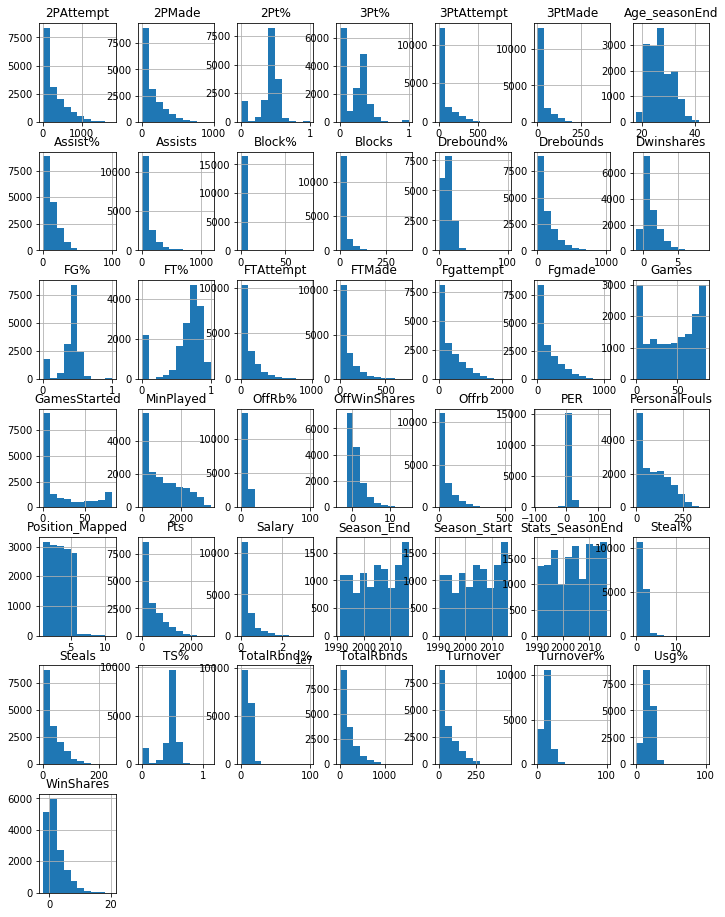

In [17]:
data.hist(figsize=(12,16));

In [28]:
box_score_features = ['Age_seasonEnd','Games','GamesStarted','MinPlayed',
                      'Fgmade','Fgattempt','3PtMade','3PtAttempt','2PMade','2PAttempt',
                      'FTMade','FTAttempt','Offrb','Drebounds','TotalRbnds','Assists',
                      'Steals','Blocks','Turnover','PersonalFouls','Pts','Position_Mapped']
box_score_percentages = ['OffRb%','Drebound%','TotalRbnd%','Assist%','Steal%','Block%','Turnover%','Usg%',
                         '3Pt%','2Pt%','FT%']
combo_features = ['PER','TS%','Usg%','OffWinShares','Dwinshares','WinShares']

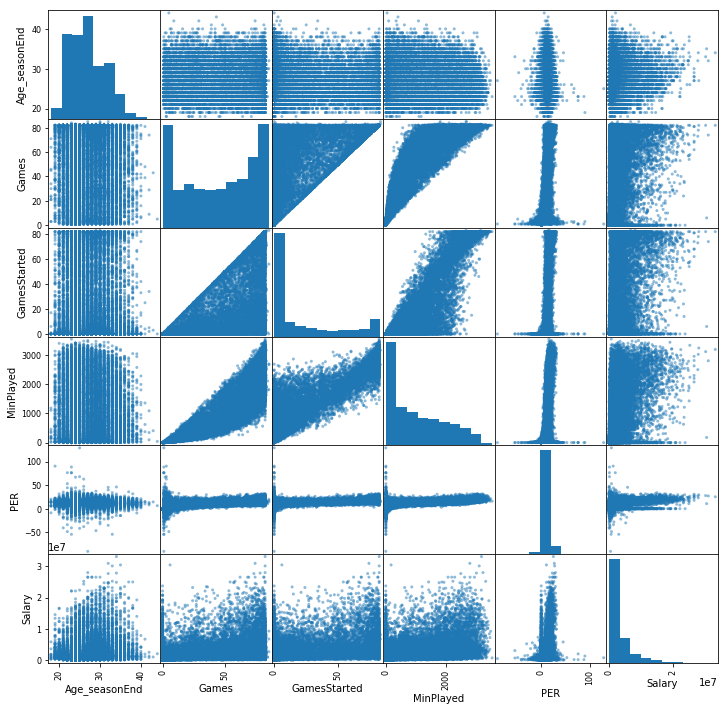

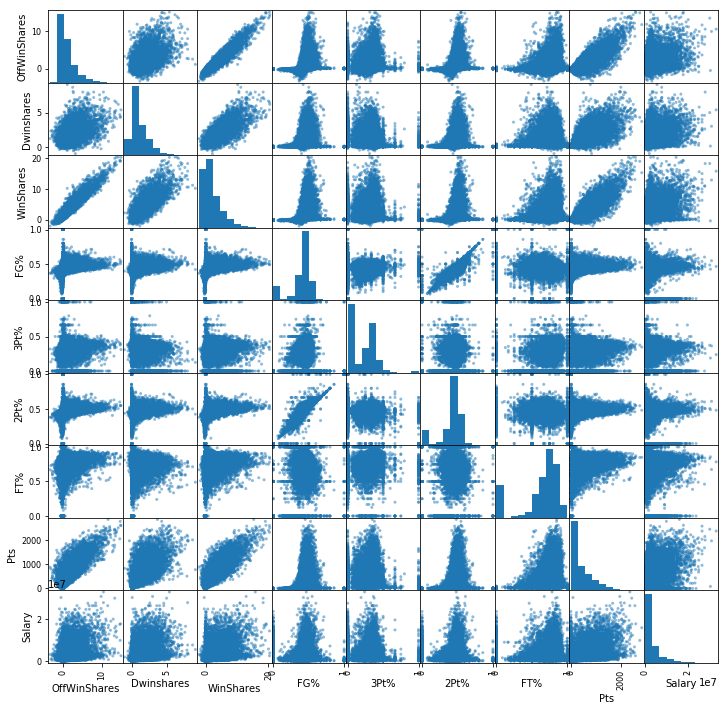

In [18]:
#running several scatter_matrix plots because it's a lot to look at...
pd.plotting.scatter_matrix(data.loc[:, ['Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'Salary']], figsize=(12, 12));

pd.plotting.scatter_matrix(data.loc[:, ['OffWinShares', 'Dwinshares', 'WinShares',
 'FG%', '3Pt%','2Pt%', 'FT%', 'Pts', 'Salary']], figsize=(12, 12));


Starting analysis of salaries:
- Look at salary by season per team, where total salary = sum of all salaries in the table (this may be missing some data, but will have to be OK with that...)

Salary observations:
- Trend should be pretty much the same across teams for full salary, because it should generally equal the cap of the year
- Salary has increased a ton from 1990 - 2017 seasons, which aligns to the salary cap increase: 1990 salary cap was ~11MM
- 2017 season cap was almost $100MM
- Charlotte has a huge gap in the middle because the team moved to New Orleans for a bit

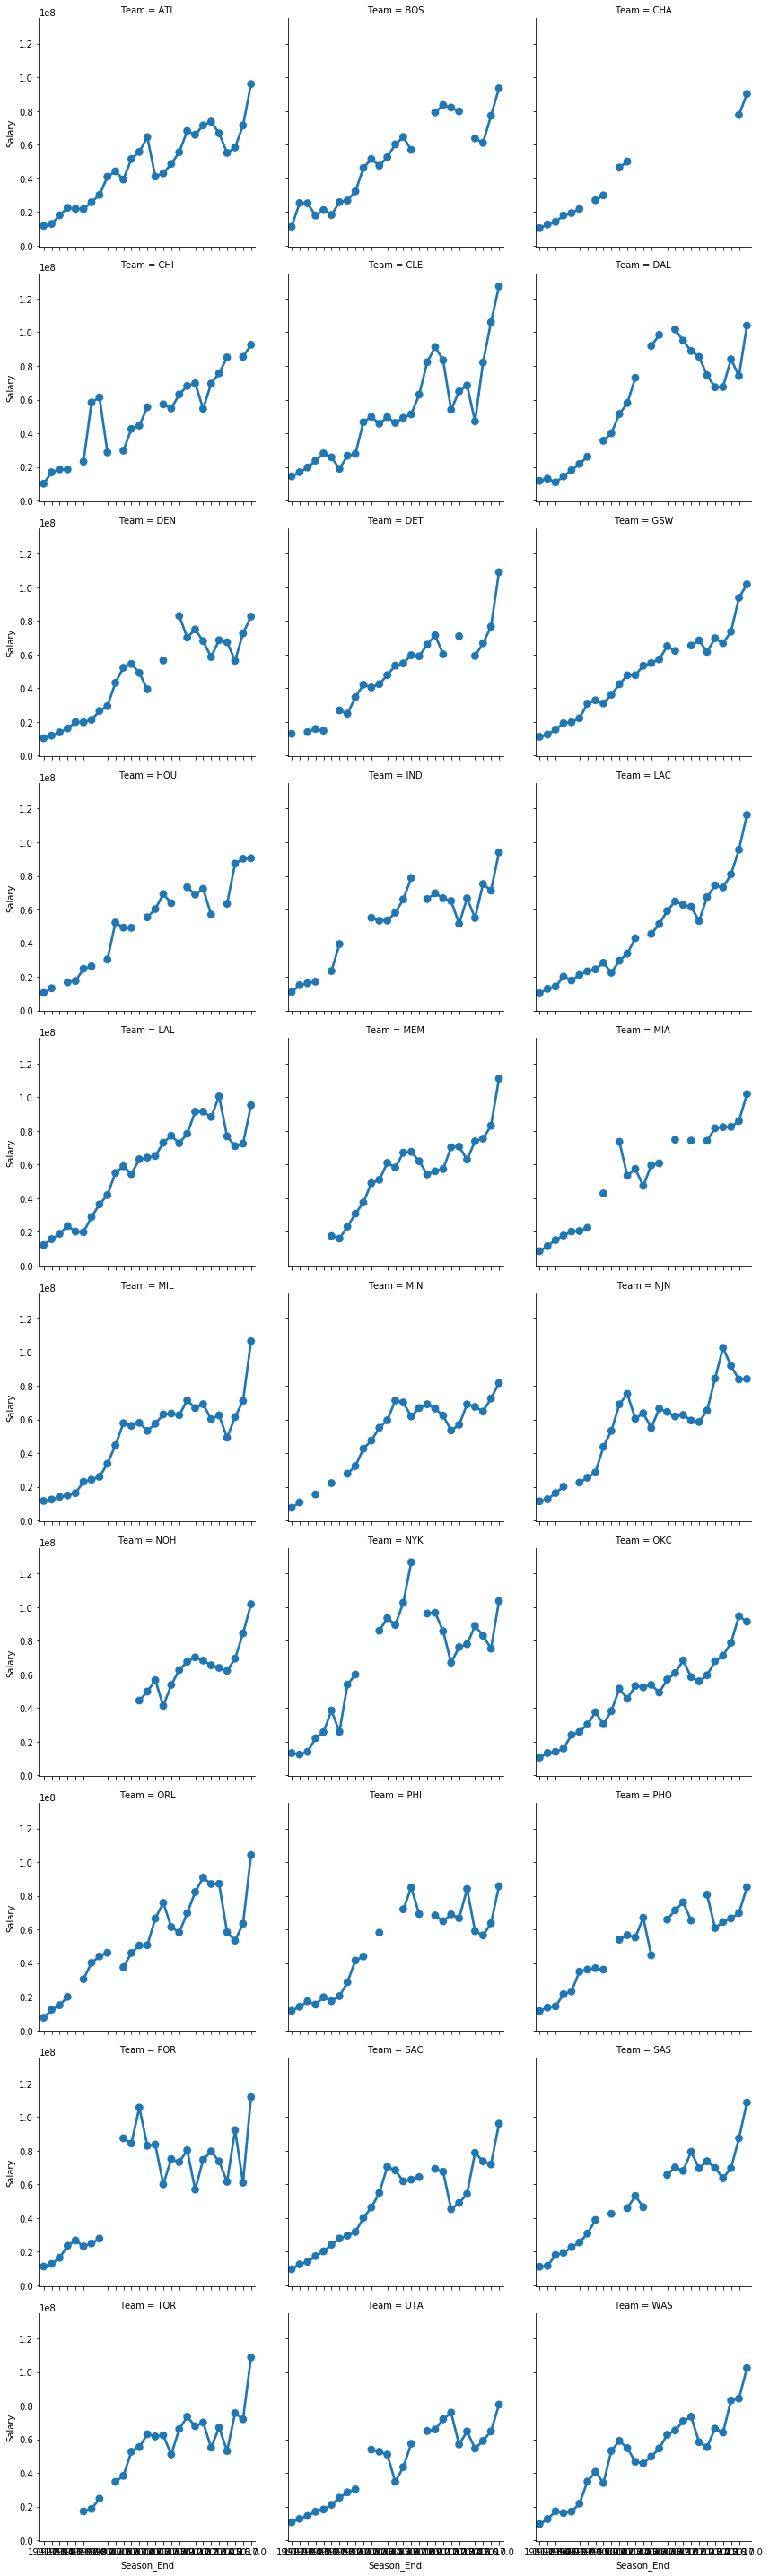

In [19]:
salary_by_year = data.loc[:, ['Team', 'Season_End', 'Salary', 'WinShares']].groupby(['Team', 'Season_End']).sum(axis=1)
salary_by_year.reset_index(inplace=True)

sns.factorplot(x='Season_End', y='Salary', col='Team', col_wrap=3, data=salary_by_year);

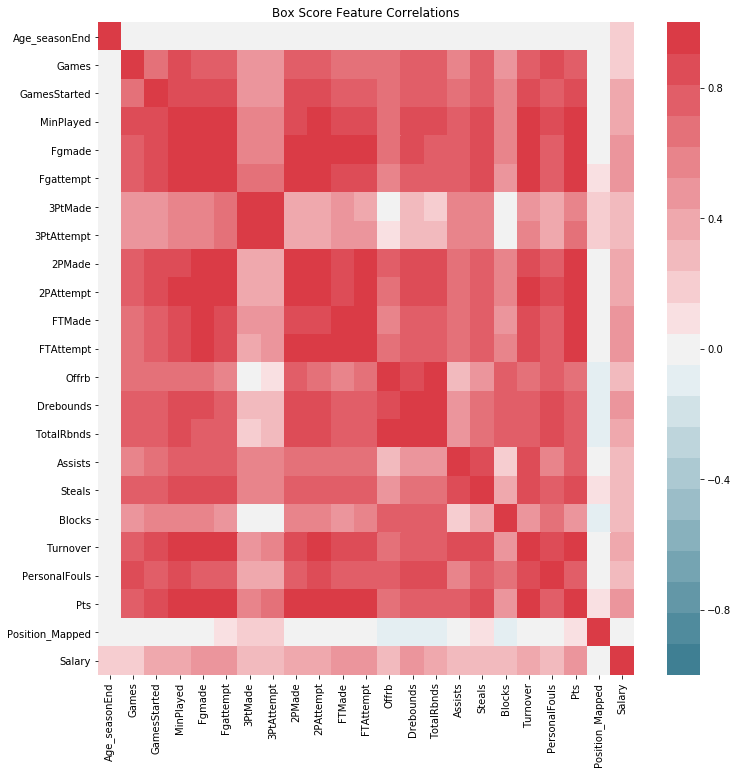

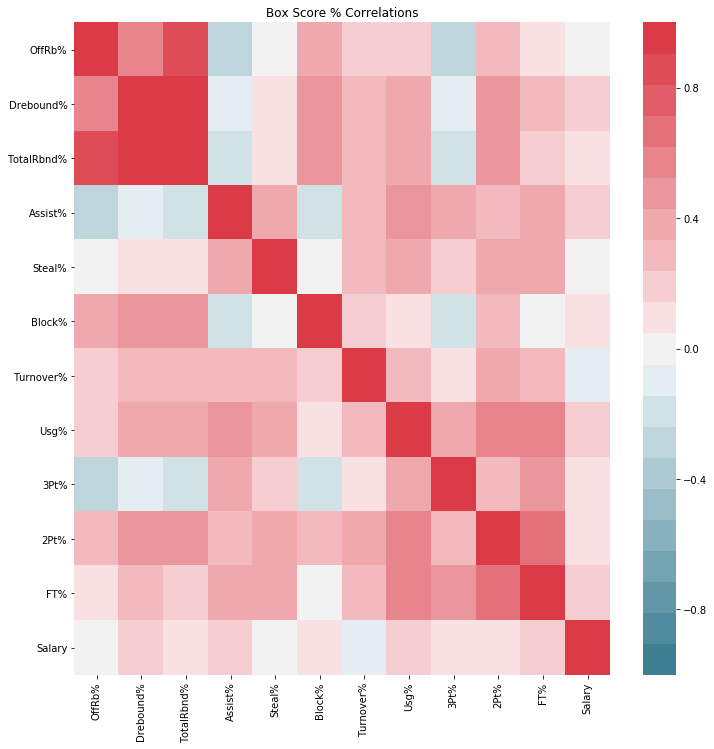

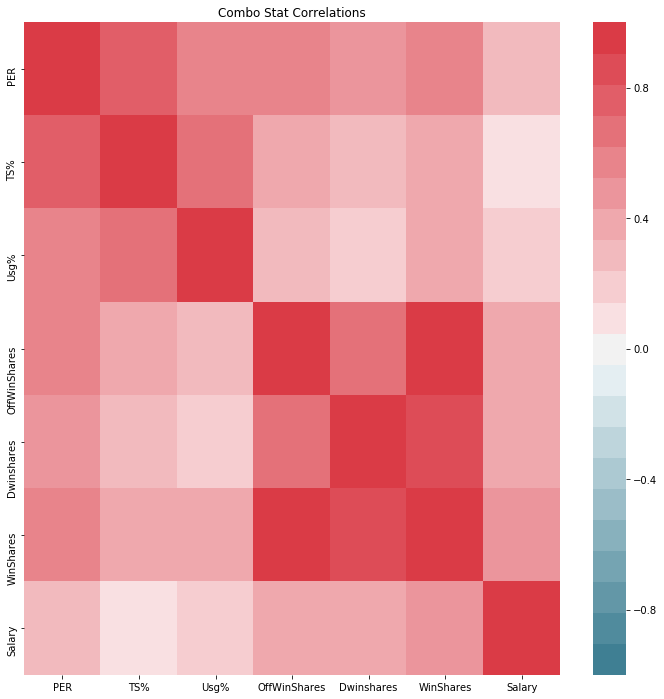

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['Age_seasonEnd','Games','GamesStarted','MinPlayed',
                      'Fgmade','Fgattempt','3PtMade','3PtAttempt','2PMade','2PAttempt',
                      'FTMade','FTAttempt','Offrb','Drebounds','TotalRbnds','Assists',
                      'Steals','Blocks','Turnover','PersonalFouls','Pts','Position_Mapped', 'Salary']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Box Score Feature Correlations');

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['OffRb%','Drebound%','TotalRbnd%','Assist%','Steal%','Block%','Turnover%','Usg%',
                         '3Pt%','2Pt%','FT%', 'Salary']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Box Score % Correlations');


fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, ['PER','TS%','Usg%','OffWinShares','Dwinshares','WinShares', 'Salary']].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);
ax.set_title('Combo Stat Correlations');

Correlation observations:
- Not a lot of single values are super strongly correlated to salary; highest are 

Look at relationship of salary vs win shares, which is a stat that tries to quantify a player's impact on his team's success
- Filtering to players who played >70 minutes per season to reduce the data a bit

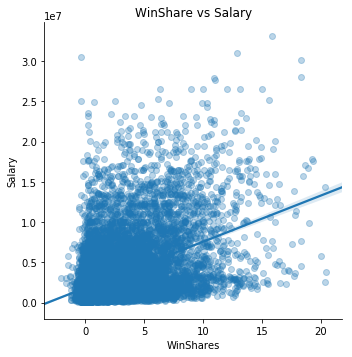

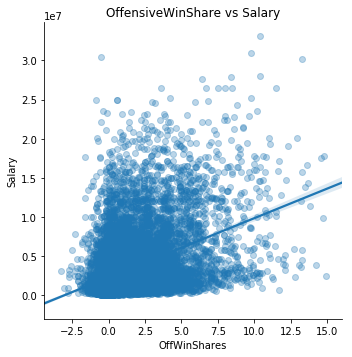

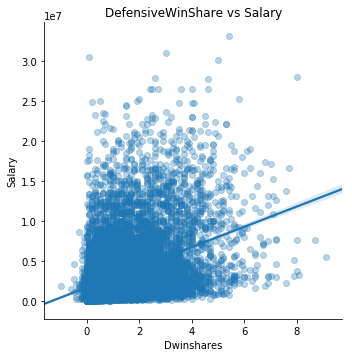

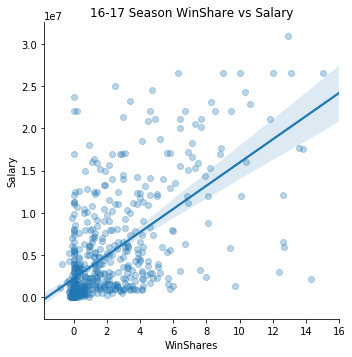

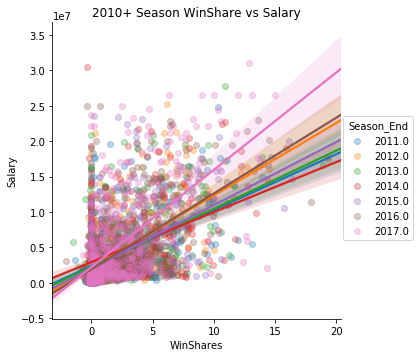

In [20]:
#Salary vs WinShares

morethan70minperseason = data.loc[data.loc[:, 'MinPlayed'] >= 70, :]

sns.lmplot(data=morethan70minperseason, x='WinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("WinShare vs Salary")

sns.lmplot(data=morethan70minperseason, x = 'OffWinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("OffensiveWinShare vs Salary")

sns.lmplot(data=morethan70minperseason, x = 'Dwinshares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("DefensiveWinShare vs Salary")

sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == 2017, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("16-17 Season WinShare vs Salary");

sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] > 2010, :], 
           x='WinShares', 
           y='Salary', 
           hue = 'Season_End', 
           scatter_kws={'alpha':0.3})
ax = plt.gca()
ax.set_title("2010+ Season WinShare vs Salary");

In [21]:
print('Salary vs Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'WinShares']))
print('Salary vs Offensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'OffWinShares']))
print('Salary vs Defensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'Dwinshares']))

Salary vs Win Share correlation: 0.4455630897398196
Salary vs Offensive Win Share correlation: 0.4276886920788764
Salary vs Defensive Win Share correlation: 0.4257576353139876


In [24]:
data.to_csv('nba_project_data.csv')